# Assignment 1

## IMDB

The Internet Movie Database (IMDB) is a database of movies, TV shows, and short films. It contains information such as movie title, release date, cast, user rating, box office gross, etc... Here we will analyse part of that data which is freely available from:  https://www.imdb.com/interfaces/.

First, a bit of prep work:

1. Create a new project directory named ``imdb``, with three subdirectories: ``data``, ``plots``, and ``scripts``.
2. Copy the ``title.basics.tsv.gz`` and ``title.ratings.tsv.gz`` zipped TSV (Tab-Separated Variables) data files to your ``imdb/data`` directory.
3. Open PyCharm and create a new PyCharm project.
4. Create a new Python File called ``imdb_explore.py`` in the ``imdb/scripts/`` directory.

Now write code that does the following, cleaning and validating the data as you go:

1. Load the ``title.basics.tsv.gz`` and ``title.ratings.tsv.gz`` data files into two different DataFrames. Documentation for these ``basics`` and ``ratings`` tables is available here:  https://www.imdb.com/interfaces/
2. Use the ``.info()`` and ``.describe()`` DataFrame methods to explore the ``basics`` and ``ratings`` tables.
3. Create a break-point in PyCharm on any line after the ``basics`` and ``ratings`` tables have been loaded, then go to the Debugger tab and use "View as DataFrame" to explore the tables.
4. Merge the ``basics`` and ``ratings`` tables together.
5. Search for a few movies you know, just to check the data. Searching for a well known series of movies is also useful for this type of data validation, such as the "Star Wars" movies.
6. Write code that selects only a random sample of 10% of the ``basics`` data table. This will make computations more efficient while you are developing your code, but remember to re-run the code on all data when you want to actually generate results.
7. Plot the number of movies over time. Which date column is best to use here? Use this plot to check/validate your data:
    - Do these yearly numbers make sense?
    - Are there any years where there appear to be missing data?
8. Save all plots you produce in this assignment to the ``imdb/plots`` directory.
9. Plot the number of movies in each genre over time, for the top 10 genres. You may need to transform the ``genres`` column into a more easily plotted form.
10. Plot the **proportion** of movies in each genre over time, for the top 10 genres. Use this plot to check/validate your data:
    - Which genres become more/less prevalent over time?
    - Do these proportions make sense for the different genres?
11. Use the ``.groupby()`` DataFrame method to group movies by genre, and the ``.describe()`` method to obtain basic statistics by genre.
    - Which genre has the highest average rating? (Note that you can also obtain this using the ``.mean()`` method, rather than the ``.describe()`` method)
    - Which has the lowest?
12. Use the DataFrame method ``.plot(kind='scatter')`` to make a scatter plot of runtimes vs.ratings.
    - Do ratings appear to be associated with runtimes?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tconst          1000 non-null   object
 1   titleType       1000 non-null   object
 2   primaryTitle    1000 non-null   object
 3   originalTitle   1000 non-null   object
 4   startYear       1000 non-null   object
 5   endYear         1000 non-null   object
 6   runtimeMinutes  1000 non-null   object
 7   genres          1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050453 entries, 0 to 1050452
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   tconst         1050453 non-null  object
 1   averageRating  1050453 non-null  object
 2   numVotes       1050453 non-null  object
dtypes: object(3)
memory usage: 24.0+ MB
        tconst titleType            

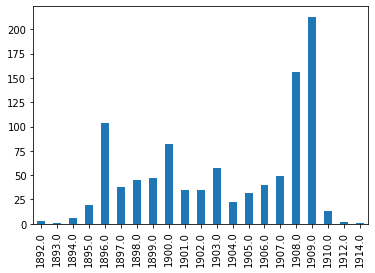

<Figure size 432x288 with 0 Axes>

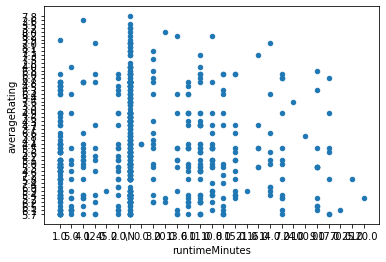

In [8]:
# Answer of Assignment_1:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# 1. Load the title.basics.tsv.gz and title.ratings.tsv.gz data files into two different DataFrames.
# raw up to 1000 to avoid memory issue (RAM) using nrows=1000
basics = pd.read_csv('../5_assignment_1/title.basics.tsv.gz', sep='\t', encoding='ISO-8859-1', dtype=str, nrows=1000)
ratings = pd.read_csv('../5_assignment_1/title.ratings.tsv.gz', sep='\t', encoding='ISO-8859-1', dtype=str)

# Save cleaned data
basics.to_csv('../5_assignment_1/title.basics.tsv.gz', sep='\t', index=False)
ratings.to_csv('../5_assignment_1/title.ratings.tsv.gz', sep='\t', index=False)

# 2. Use the .info() and .describe() DataFrame methods to explore the basics and ratings tables.
basics.info()
basics.describe()
ratings.info()
ratings.describe()

# 3. Create a break-point in PyCharm on any line after the basics and ratings tables have been loaded, then go to the Debugger tab and use "View as DataFrame" to explore the tables.
# Done

# 4. Merge the basics and ratings tables together.
merged = pd.merge(basics, ratings)
print(merged)

# 5. Search for a few movies you know, just to check the data. Searching for a well known series of movies is also useful for this type of data validation, such as the "Star Wars" movies.
# We may use this code for that : basics.lookup(basics.index, basics['Star Wars'])
#merged.loc['Star Wars']
#Check some rows that have poorly formatted data
#a = basics['runtimeMinutes']
#b = basics.loc[a[a=='Reality-TV'].index.to_list()]
#print(b)

# 6. Write code that selects only a random sample of 10% of the basics data table. This will make computations more efficient while you are developing your code, but remember to re-run the code on all data when you want to actually generate results.
# By using .sample(frac = 0.10)
ten_percent_basics = basics.sample(frac = 0.10)
print(ten_percent_basics)

# 7. Plot the number of movies over time. Which date column is best to use here? Use this plot to check/validate your data: - Do these yearly numbers make sense? - Are there any years where there appear to be missing data?
plt.figure()
basics['startYear'].value_counts().sort_index().plot.bar()
#plt.show()

# 8. Save all plots you produce in this assignment to the imdb/plots directory.
plt.savefig('../5_assignment_1/fig1.png')

# 9. Plot the number of movies in each genre over time, for the top 10 genres. You may need to transform the genres column into a more easily plotted form.


# 10. Plot the proportion of movies in each genre over time, for the top 10 genres. Use this plot to check/validate your data: - Which genres become more/less prevalent over time? - Do these proportions make sense for the different genres?


# 11. Use the .groupby() DataFrame method to group movies by genre, and the .describe() method to obtain basic statistics by genre. - Which genre has the highest average rating? (Note that you can also obtain this using the .mean() method, rather than the .describe() method) - Which has the lowest?
by_genre = merged.groupby('genres')
print(by_genre)
by_genre.describe()
print(by_genre.describe())

# 12. Use the DataFrame method .plot(kind='scatter') to make a scatter plot of runtimes vs.ratings. - Do ratings appear to be associated with runtimes?

plt.figure()
merged.plot.scatter(x='runtimeMinutes' , y='averageRating')
plt.savefig('../5_assignment_1/fig2.png')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          1000 non-null   object 
 1   titleType       1000 non-null   object 
 2   primaryTitle    1000 non-null   object 
 3   originalTitle   1000 non-null   object 
 4   startYear       1000 non-null   float64
 5   endYear         0 non-null      float64
 6   runtimeMinutes  443 non-null    float64
 7   genres          981 non-null    object 
dtypes: float64(3), object(5)
memory usage: 62.6+ KB
None
         startYear  endYear  runtimeMinutes
count  1000.000000      0.0      443.000000
mean   1903.611000      NaN        7.541761
std       4.985231      NaN        9.533458
min    1892.000000      NaN        0.000000
25%    1899.000000      NaN        1.500000
50%    1905.000000      NaN        6.000000
75%    1908.000000      NaN       11.000000
max    1914.000000      NaN      12

C:\Users\amana\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
C:\Users\amana\anaconda3\lib\site-packages\ipykernel_launcher.py:58: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


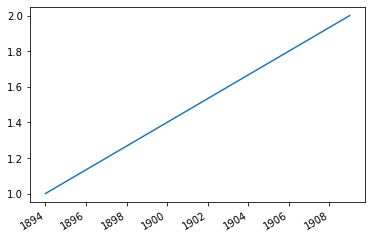

<Figure size 432x288 with 0 Axes>

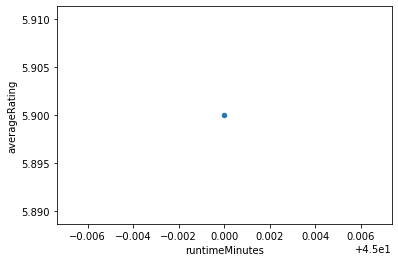

In [9]:
#Steve

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
sep='\t'
na_values = r'\N'
sample_frac = 0.10

# 1. Load the title.basics.tsv.gz and title.ratings.tsv.gz data files into two different DataFrames.
# raw up to 1000 to avoid memory issue (RAM) using nrows=1000
basics = pd.read_csv('../5_assignment_1/title.basics.tsv.gz', sep=sep, na_values = na_values, quoting=1)
ratings = pd.read_csv('../5_assignment_1/title.ratings.tsv.gz', sep=sep, na_values = na_values, quoting=1)

# 2. Use the .info() and .describe() DataFrame methods to explore the basics and ratings tables.
print(basics.info())
print(basics.describe())

print(ratings.info())
print(ratings.describe())

# Check some rows that have poorly formatted data
a = basics['runtimeMinutes']
b = basics.loc[a[a=='Reality-TV'].index.to_list()]
print(b)

movies = basics[basics['titleType'] == 'movie']
del basics

# 3. Create a break-point in PyCharm on any line after the basics and ratings tables have been loaded, then go to the Debugger tab and use "View as DataFrame" to explore the tables.
# Done

# 4. Merge the basics and ratings tables together.

movies['runtimeMinutes'] = pd.to_numeric(movies['runtimeMinutes'])
movies['startYear'] = pd.to_datetime(movies['startYear'], format='%Y')
movies['endYear'] = pd.to_datetime(movies['endYear'], format='%Y', errors='coerce')

movie_ratings = pd.merge(movies, ratings, on='tconst', how='left')

# 5. Search for a few movies you know, just to check the data. Searching for a well known series of movies is also useful for this type of data validation, such as the "Star Wars" movies.


# 6. Write code that selects only a random sample of 10% of the basics data table. This will make computations more efficient while you are developing your code, but remember to re-run the code on all data when you want to actually generate results.

if sample_frac:
    movie_ratings = movie_ratings.sample(frac=sample_frac)

movies['genres'].value_counts()
movies['tconst'].value_counts()
movies['tconst'].nunique()
len(movie_ratings)

# 7. Plot the number of movies over time. Which date column is best to use here? Use this plot to check/validate your data: - Do these yearly numbers make sense? - Are there any years where there appear to be missing data?

plt.figure()
pd.Series().sort_values()
counts = movie_ratings['startYear'].value_counts().sort_index()
counts.plot()
plt.savefig('../5_assignment_1/moviecounts_vs_time')

# Just a test
#plt.figure()
#plt.scatter(x=[1,3], y=[2,3])
#plt.show()

# 8. Save all plots you produce in this assignment to the imdb/plots directory.


# 9. Plot the number of movies in each genre over time, for the top 10 genres. You may need to transform the genres column into a more easily plotted form.


# 10. Plot the proportion of movies in each genre over time, for the top 10 genres. Use this plot to check/validate your data: - Which genres become more/less prevalent over time? - Do these proportions make sense for the different genres?
# Proportion:

#plt.figure()
#grouped = df.groupby(['startYear', 'genre']).apply(len).unstack(1)
#grouped.plot()
#plt.show()

#plt.figure()
#counts = movie_ratings.groupby(['startYear'].apply(len)
#propn_groups = grouped.div(counts, axis=0)
#propn_groups = propn_groups.rolling(window=5).mean()
#propn_groups.plot(ylim=[0, 0.5], alpha=0.7)
#plt.show()

# Top ten:

#movie_ratings['genre'] = movie_ratings['genres'].str.split(',')
#df = movie_ratings.explode('genre')

#df['genre'].value_counts()[:10]
#df['genre'].value_counts()[:10].index.values


# 11. Use the .groupby() DataFrame method to group movies by genre, and the .describe() method to obtain basic statistics by genre. - Which genre has the highest average rating? (Note that you can also obtain this using the .mean() method, rather than the .describe() method) - Which has the lowest?

#for group_name, group in df.groupby('startYear'):
#    print(group_name)

#top_genres = list(df['genre'].value_counts()[:10].index.values)
#df = df[df['genre'].isin(top_genres)]


#grouped.plot()
#plt.show()

#pd.DataFrame().unstack()

#plt.figure()
#grouped = df.groupby(['startYear', 'genre']).apply(len).unstack(1)
#grouped.plot()
#plt.show()



# 12. Use the DataFrame method .plot(kind='scatter') to make a scatter plot of runtimes vs.ratings. - Do ratings appear to be associated with runtimes?
plt.figure()
movie_ratings.plot.scatter(x='runtimeMinutes' , y='averageRating')
plt.savefig('../5_assignment_1/fig_scatter.png')


## Good coding practises

Remember, try to write comments first -- i.e. write a comment for each task your code will perform, then fill in your code under each of those comments. You can of course update those comments as you go, to more accurately reflect what your code does.

Also, try to avoid copying and pasting lines of code with minor alterations. In situations where you instinctively want to copy and paste code multiple times, consider if it would be better to write a short function that performs that task. You can then call that function multiple times in your code, wherever that task (or slight variations on that task) need to be performed. A few of the main advantages of this are:

- your code will become easier to read and understand (for other people but also for yourself),
- silent errors will be less likely to occur (because duplicated tasks can be modified at a single place in the code-base),
- if you need to alter the task in any way, you just need to change the function itself, rather than finding and changing multiple different lines of code.

## Refactoring your code

Refactoring code is like cleaning house -- it is the process of cleaning up your code to make it more organised, readable, etc... Refactoring is important because code can become untidy very quickly, which slows down code development and makes it harder for yourself or someone else to understand your code later on.

Refactor the code you have written for this assignment, by:

- commenting your code if you haven't already done so,
- make sure that the comments you wrote prior to writing your code still accurately reflect what the code does,
- for segments of code that can be grouped under a single task, move those into their own function (e.g. a ``load_imdb`` function that loads the data and returns the associated DataFrame(s)),
- move functions into their own module, particularly if those functions are used by multiple different scripts,
- try to find and remove magic numbers,
- etc...

It is good practise to try to do a bit of refactoring as you go; e.g. whenever you realise that comments are missing, or that some chunk of code might work better as an encapsulated function.

## Bonus task: correlation matrix plot

As a bonus task, plot the correlation matrix for genres -- this will show which genre pairs are usually associated with each other, which are not correlated, and which are anti-correlated. The following steps are useful:

1. Use the ``.corr()`` DataFrame method to calculate the correlation matrix for genres. You will first need to transform the ``genres`` column into many columns; one column per genre (each row will need a 1 for any relevant genres, and 0 for all other genres).
2. Use the ``seaborn`` module's ``jointplot`` function to plot the correlation matrix. Use this plot to check/validate your data:
    - Which genre pairs are more correlated?
    - Which genre pairs are anti-correlated?
    - Do these results make sense?

## Free-form analysis

Now come up with your own analysis of the data. It can be anything you want, but you need to produce a single plot that gets the point across.